In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sql = '''
select *
from customers
JOIN contract_types USING(`contract_type_id`)
JOIN internet_service_types USING(`internet_service_type_id`)
JOIN payment_types USING(payment_type_id);
'''

In [3]:
import env

def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

df = pd.read_sql(sql, get_connection('telco_churn'))

df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
1,4,1,1,0013-MHZWF,Female,0,No,Yes,9,Yes,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)
2,1,1,1,0015-UOCOJ,Female,1,No,No,7,Yes,...,No,No,No,Yes,48.2,340.35,No,Month-to-month,DSL,Electronic check
3,1,1,1,0023-HGHWL,Male,1,No,No,1,No,...,No,No,No,Yes,25.1,25.1,Yes,Month-to-month,DSL,Electronic check
4,3,1,1,0032-PGELS,Female,0,Yes,Yes,1,No,...,No,No,No,No,30.5,30.5,Yes,Month-to-month,DSL,Bank transfer (automatic)


In [10]:
import os

def get_telco_data():
    filename = "telco.csv"
    df = pd.read_csv(filename)
    return df  

In [7]:
df.to_csv("telco.csv")

In [11]:
get_telco_data()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
1,1,4,1,1,0013-MHZWF,Female,0,No,Yes,9,...,Yes,Yes,Yes,Yes,69.40,571.45,No,Month-to-month,DSL,Credit card (automatic)
2,2,1,1,1,0015-UOCOJ,Female,1,No,No,7,...,No,No,No,Yes,48.20,340.35,No,Month-to-month,DSL,Electronic check
3,3,1,1,1,0023-HGHWL,Male,1,No,No,1,...,No,No,No,Yes,25.10,25.1,Yes,Month-to-month,DSL,Electronic check
4,4,3,1,1,0032-PGELS,Female,0,Yes,Yes,1,...,No,No,No,No,30.50,30.5,Yes,Month-to-month,DSL,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,4,3,3,9950-MTGYX,Male,0,Yes,Yes,28,...,No internet service,No internet service,No internet service,Yes,20.30,487.95,No,Two year,None,Credit card (automatic)
7039,7039,2,3,3,9953-ZMKSM,Male,0,No,No,63,...,No internet service,No internet service,No internet service,No,25.25,1559.3,No,Two year,None,Mailed check
7040,7040,4,3,3,9964-WBQDJ,Female,0,Yes,No,71,...,No internet service,No internet service,No internet service,Yes,24.40,1725.4,No,Two year,None,Credit card (automatic)
7041,7041,3,3,3,9972-EWRJS,Female,0,Yes,Yes,67,...,No internet service,No internet service,No internet service,Yes,19.25,1372.9,No,Two year,None,Bank transfer (automatic)


In [15]:
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
1,4,1,1,0013-MHZWF,Female,0,No,Yes,9,Yes,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)
2,1,1,1,0015-UOCOJ,Female,1,No,No,7,Yes,...,No,No,No,Yes,48.2,340.35,No,Month-to-month,DSL,Electronic check
3,1,1,1,0023-HGHWL,Male,1,No,No,1,No,...,No,No,No,Yes,25.1,25.1,Yes,Month-to-month,DSL,Electronic check
4,3,1,1,0032-PGELS,Female,0,Yes,Yes,1,No,...,No,No,No,No,30.5,30.5,Yes,Month-to-month,DSL,Bank transfer (automatic)


In [17]:
df.shape

(7043, 24)

In [19]:
df.columns.to_list()

['payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [20]:
df.dtypes

payment_type_id               int64
internet_service_type_id      int64
contract_type_id              int64
customer_id                  object
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
paperless_billing            object
monthly_charges             float64
total_charges                object
churn                        object
contract_type                object
internet_service_type        object
payment_type                 object
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_type_id,7043.0,2.315633,1.148907,1.00,1.0,2.00,3.00,4.00
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00
contract_type_id,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [22]:
numcols = df.columns[[df[col].dtype != 'object' for col in df.columns]]

In [23]:
numcols

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'senior_citizen', 'tenure', 'monthly_charges'],
      dtype='object')

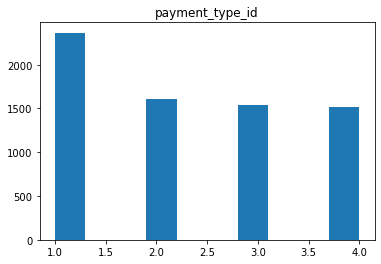

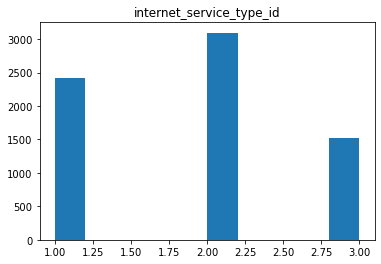

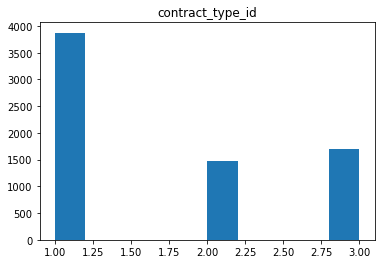

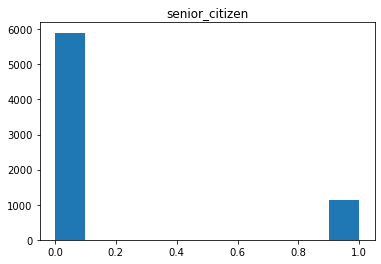

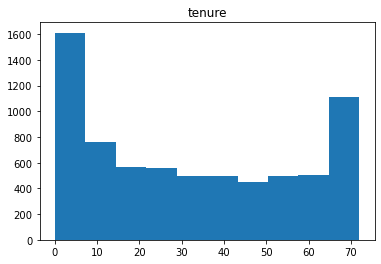

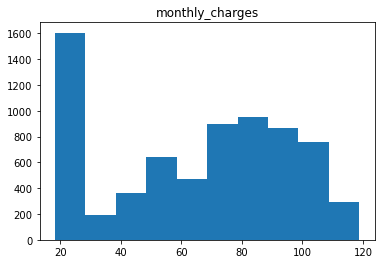

In [26]:
for col in numcols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()


In [27]:
catcols = df.columns[[df[col].dtype == 'O' for col in df.columns]]

In [28]:
# observe our categorical columns distribution:
for col in catcols:
    print(f'For {col} : \n')
    print(df[col].value_counts())
    print(f'\n {df[col].value_counts(normalize=True, dropna=False)}')
    print('-----------------------------\n')

For customer_id : 

4526-ZJJTM    1
7989-CHGTL    1
6257-RJOHI    1
1024-GUALD    1
5299-RULOA    1
             ..
7088-FBAWU    1
5161-XEUVX    1
4973-RLZVI    1
5222-JCXZT    1
2160-GPFXD    1
Name: customer_id, Length: 7043, dtype: int64

 4526-ZJJTM    0.000142
7989-CHGTL    0.000142
6257-RJOHI    0.000142
1024-GUALD    0.000142
5299-RULOA    0.000142
                ...   
7088-FBAWU    0.000142
5161-XEUVX    0.000142
4973-RLZVI    0.000142
5222-JCXZT    0.000142
2160-GPFXD    0.000142
Name: customer_id, Length: 7043, dtype: float64
-----------------------------

For gender : 

Male      3555
Female    3488
Name: gender, dtype: int64

 Male      0.504756
Female    0.495244
Name: gender, dtype: float64
-----------------------------

For partner : 

No     3641
Yes    3402
Name: partner, dtype: int64

 No     0.516967
Yes    0.483033
Name: partner, dtype: float64
-----------------------------

For dependents : 

No     4933
Yes    2110
Name: dependents, dtype: int64

 No     0.7004